
# RatePlan_Updated

Analysis is done on basis of files that were proccessed at first 9 days of the December 2021.


## Import the relevant libraries

In [117]:
from IPython.display import display, HTML

display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 65%; }
    div#maintoolbar-container { width: 99%; }
</style>
"""))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import json
sns.set()

## Load all parquet files that were available with that message

In [118]:
HotelRateAmountNotifRQ_Messages = pd.read_parquet("Documents/ugo_ratep_update", engine='auto')
HotelRateAmountNotifRQ_Messages

,RatePlanNotifications
0,[{'NotificationMeta': {'X-Correlation-ID': 'OF...
1,[{'NotificationMeta': {'X-Correlation-ID': 'OF...
2,[{'NotificationMeta': {'X-Correlation-ID': 'OF...
3,[{'NotificationMeta': {'X-Correlation-ID': 'OF...
4,[{'NotificationMeta': {'X-Correlation-ID': 'OF...
5,[{'NotificationMeta': {'X-Correlation-ID': 'OF...
6,[{'NotificationMeta': {'X-Correlation-ID': 'OF...
7,[{'NotificationMeta': {'X-Correlation-ID': 'OF...
8,[{'NotificationMeta': {'X-Correlation-ID': 'OF...
9,[{'NotificationMeta': {'X-Correlation-ID': 'OF...


## Create DataFrame from loaded data

### Resolving first level of nesting<hr>

In [119]:
firstLevel = []
for index, level in HotelRateAmountNotifRQ_Messages.iterrows():
    firstLevel.extend(HotelRateAmountNotifRQ_Messages.iloc[index,0])


### Resolving all levels of nesting<hr>

In [120]:
import pandas as pd
import numpy as np

def resolveRow(di, row_data):
    newDi = []
    for row in row_data:
        di.update(row)
        newDi.append(di)
    return newDi

def createDF(li, key_level=""):
    listOfResolved = []
    for level in li:
        
        row_data = None
        level1 = {}
        wrong = []
        if not isinstance(level, str):          
            for key, value in level.items():
                if isinstance(value, np.ndarray):
                    row_data = createDF(value, key)            
                elif isinstance(value, dict):
                    level1.update(value)
                elif isinstance(value, list):
                    for i in value:
                        if isinstance(i, dict):
                            level1.update(i)
                else:
                    level1[key_level + "_" + key] = value

            if row_data is not None:
                newDi = resolveRow(level1, row_data)
                listOfResolved.extend(newDi)
            else:
                listOfResolved.append(level1)
        else:
            wrong.append(level)
            
    return listOfResolved


def checkType(new):
    key_types = []
    values_t = []
    for n in new:
        new_keys = [type(z) for z in n.values()]
        if (new_keys in key_types) | len(key_types) == 0:
            key_types.append(new_keys)
        else:
            continue
    for z in key_types:
        values_t.extend([True if n in [np.ndarray, dict, list] else False for n in z])

    return any(values_t)

def allTogether(firstLevel):
    levelTemp = createDF(firstLevel)
    while checkType(levelTemp):
        newL = createDF(levelTemp)
        levelTemp = newL
    return levelTemp
    
final = allTogether(firstLevel)


### Creating DataFrame<hr>

In [121]:
finalData_raw = pd.DataFrame(final)
finalData_raw.columns = [re.sub("^_+","",x) for x in finalData_raw.columns]
finalData_raw

,X-Correlation-ID,Type,CmHotelId,CmRatePlanId,Origin,Name,MealPlan,OtherConditions,Fees,OriginalData,CancellationPolicy_Type,CancellationPolicy_ExpiresDaysBefore,CancellationPolicy_ExpiresOnHour,CancellationPolicy_RefundPercentage,CancellationPolicy_RefundFee,CancellationPolicy_RefundWithoutNights
0,OFF321951-1,RATEPLAN_CREATED,None,IYS05-BB,derbysoft,None,Breakfast included,None,None,,Partially refundable,None,None,None,None,1.0
1,OFF321951-2,RATEPLAN_CREATED,None,IDH05-RO,derbysoft,None,Room only,None,None,,Partially refundable,None,None,None,None,1.0
2,OFF321951-2,RATEPLAN_CREATED,None,IDH05-RO,derbysoft,None,Room only,None,None,,Partially refundable,None,None,None,None,1.0
3,OFF321951-2,RATEPLAN_CREATED,None,IKA05-BB,derbysoft,None,Breakfast included,None,None,,Partially refundable,None,None,None,None,1.0
4,OFF321951-2,RATEPLAN_CREATED,None,IKA05-BB,derbysoft,None,Breakfast included,None,None,,Partially refundable,None,None,None,None,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522,OFF322297-6,RATEPLAN_UPDATED,None,IDU05-RO,derbysoft,None,Room only,None,None,,Partially refundable,None,None,None,None,1.0
523,OFF322297-6,RATEPLAN_UPDATED,None,IKB05-BB,derbysoft,None,Breakfast included,None,None,,Partially refundable,None,None,None,None,1.0
524,OFF322297-6,RATEPLAN_UPDATED,None,IKB05-BB,derbysoft,None,Breakfast included,None,None,,Partially refundable,None,None,None,None,1.0
525,OFF322297-11,RATEPLAN_UPDATED,None,IDU05-BB,derbysoft,None,Breakfast included,None,None,,Partially refundable,None,None,None,None,1.0


### Creating working dataset

In [122]:
OTA_HotelRateAmountNotifRQ = finalData_raw.copy()

# Data Analysis

### Basic information about data<hr>

In [123]:
OTA_HotelRateAmountNotifRQ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 527 entries, 0 to 526
Data columns (total 16 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X-Correlation-ID                        527 non-null    object 
 1   Type                                    527 non-null    object 
 2   CmHotelId                               0 non-null      object 
 3   CmRatePlanId                            527 non-null    object 
 4   Origin                                  527 non-null    object 
 5   Name                                    11 non-null     object 
 6   MealPlan                                527 non-null    object 
 7   OtherConditions                         0 non-null      object 
 8   Fees                                    0 non-null      object 
 9   OriginalData                            527 non-null    object 
 10  CancellationPolicy_Type                 527 non-null    object

In [124]:
OTA_HotelRateAmountNotifRQ.head(5).transpose()

,0,1,2,3,4
X-Correlation-ID,OFF321951-1,OFF321951-2,OFF321951-2,OFF321951-2,OFF321951-2
Type,RATEPLAN_CREATED,RATEPLAN_CREATED,RATEPLAN_CREATED,RATEPLAN_CREATED,RATEPLAN_CREATED
CmHotelId,None,None,None,None,None
CmRatePlanId,IYS05-BB,IDH05-RO,IDH05-RO,IKA05-BB,IKA05-BB
Origin,derbysoft,derbysoft,derbysoft,derbysoft,derbysoft
Name,None,None,None,None,None
MealPlan,Breakfast included,Room only,Room only,Breakfast included,Breakfast included
OtherConditions,None,None,None,None,None
Fees,None,None,None,None,None
OriginalData,,,,,


### Basic statistic for data<hr>

In [125]:
OTA_HotelRateAmountNotifRQ.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
X-Correlation-ID,527,186,OFF321930-5,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,527,2,RATEPLAN_UPDATED,517,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CmHotelId,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CmRatePlanId,527,9,IKA05-BB,126,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Origin,527,1,derbysoft,527,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Name,11,1,.,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MealPlan,527,3,Breakfast included,305,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OtherConditions,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fees,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OriginalData,527,1,,527,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Checking unique values for OriginalData

In [126]:
OTA_HotelRateAmountNotifRQ.OriginalData.unique()

array([''], dtype=object)

#### Checking unique values for Name

In [127]:
OTA_HotelRateAmountNotifRQ.Name.unique()

array([None, '.'], dtype=object)

#### Removing columns with 0 values/null values, that gives nothing to analysis

In [128]:
OTA_HotelRateAmountNotifRQ = OTA_HotelRateAmountNotifRQ.drop(columns=["CmHotelId", "OtherConditions", "Fees","CancellationPolicy_ExpiresDaysBefore",
                                                                     "CancellationPolicy_ExpiresOnHour","CancellationPolicy_RefundPercentage","CancellationPolicy_RefundFee"])

In [129]:
OTA_HotelRateAmountNotifRQ.describe(include = "all").transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
X-Correlation-ID,527,186,OFF321930-5,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,527,2,RATEPLAN_UPDATED,517,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CmRatePlanId,527,9,IKA05-BB,126,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Origin,527,1,derbysoft,527,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Name,11,1,.,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MealPlan,527,3,Breakfast included,305,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OriginalData,527,1,,527,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CancellationPolicy_Type,527,2,Partially refundable,518,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CancellationPolicy_RefundWithoutNights,518.0,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0


#### Checking null values for CmRatePlanId

In [130]:
OTA_HotelRateAmountNotifRQ.CmRatePlanId.isna().sum()

0

In [131]:
OTA_HotelRateAmountNotifRQ.CmRatePlanId.unique()

array(['IYS05-BB', 'IDH05-RO', 'IKA05-BB', 'IDH05-BB', 'IDU05-BB',
       'IDU05-RO', 'IKB05-BB', 'IKD05-HB', 'IKP05-RO'], dtype=object)

#### Checking null values for Origin

In [132]:
OTA_HotelRateAmountNotifRQ.Origin.isna().sum()

0

In [133]:
OTA_HotelRateAmountNotifRQ.Origin.unique()

array(['derbysoft'], dtype=object)

#### Breaking CmRatePlanId by Origin

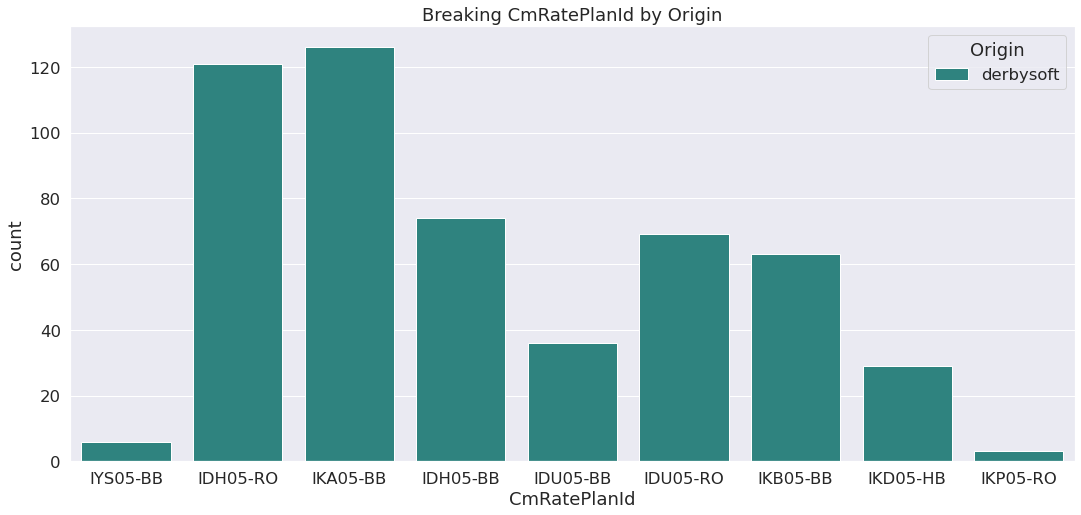

In [135]:
plt.figure(figsize=(18,8))
sns.set(font_scale = 1.5)
sns.countplot(x = OTA_HotelRateAmountNotifRQ.CmRatePlanId, data = OTA_HotelRateAmountNotifRQ, hue = OTA_HotelRateAmountNotifRQ.Origin, palette = 'viridis')
plt.title("Breaking CmRatePlanId by Origin")
plt.show()

#### Checking for unique values for OriginalData column

In [136]:
OTA_HotelRateAmountNotifRQ.OriginalData.unique()

array([''], dtype=object)

#### Checking against null values for MealPlan

In [137]:
OTA_HotelRateAmountNotifRQ.MealPlan.isna().sum()

0

####  Breaking MealPlan by Origin

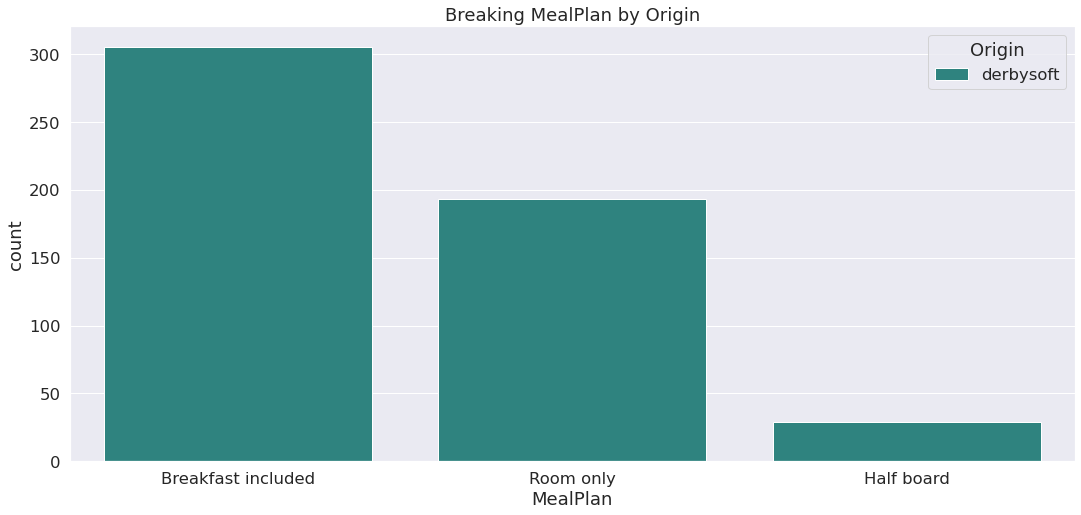

In [138]:
plt.figure(figsize=(18,8))
sns.set(font_scale = 1.5)
sns.countplot(x = OTA_HotelRateAmountNotifRQ.MealPlan, hue = OTA_HotelRateAmountNotifRQ.Origin, data = OTA_HotelRateAmountNotifRQ, palette = 'viridis')
plt.title('Breaking MealPlan by Origin')
plt.show()

####  Breaking MealPlan by CmRatePlanId

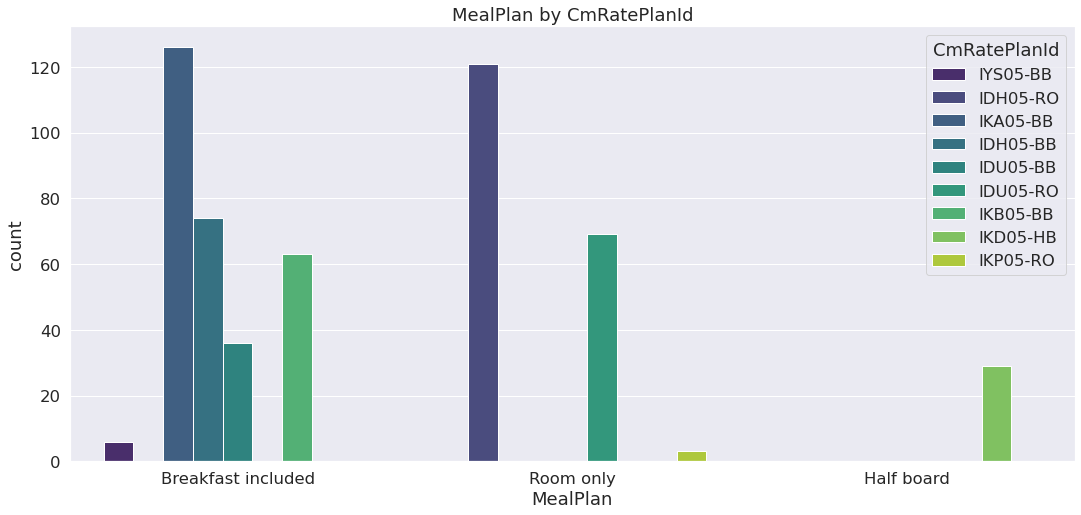

In [139]:
plt.figure(figsize=(18,8))
sns.set(font_scale = 1.5)
sns.countplot(x = OTA_HotelRateAmountNotifRQ.MealPlan, hue = OTA_HotelRateAmountNotifRQ.CmRatePlanId, data = OTA_HotelRateAmountNotifRQ, palette = 'viridis')
plt.title('MealPlan by CmRatePlanId')
plt.show()

#### Checking against null values for CancellationPolicy_Type

In [140]:
 OTA_HotelRateAmountNotifRQ.CancellationPolicy_Type.isna().sum()

0

#### Breaking CancellationPolicy_Type by Origin

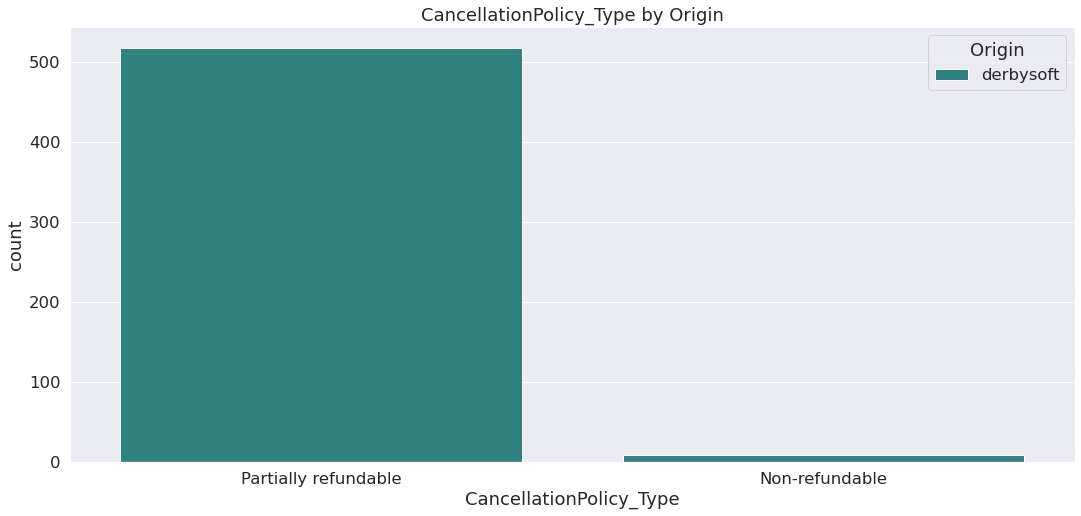

In [141]:
plt.figure(figsize=(18,8))
sns.set(font_scale = 1.5)
sns.countplot(x = OTA_HotelRateAmountNotifRQ.CancellationPolicy_Type, hue = OTA_HotelRateAmountNotifRQ.Origin, data = OTA_HotelRateAmountNotifRQ, palette = 'viridis')
plt.title('CancellationPolicy_Type by Origin')
plt.show()

#### Breaking CancellationPolicy_Type by CmRatePlanId

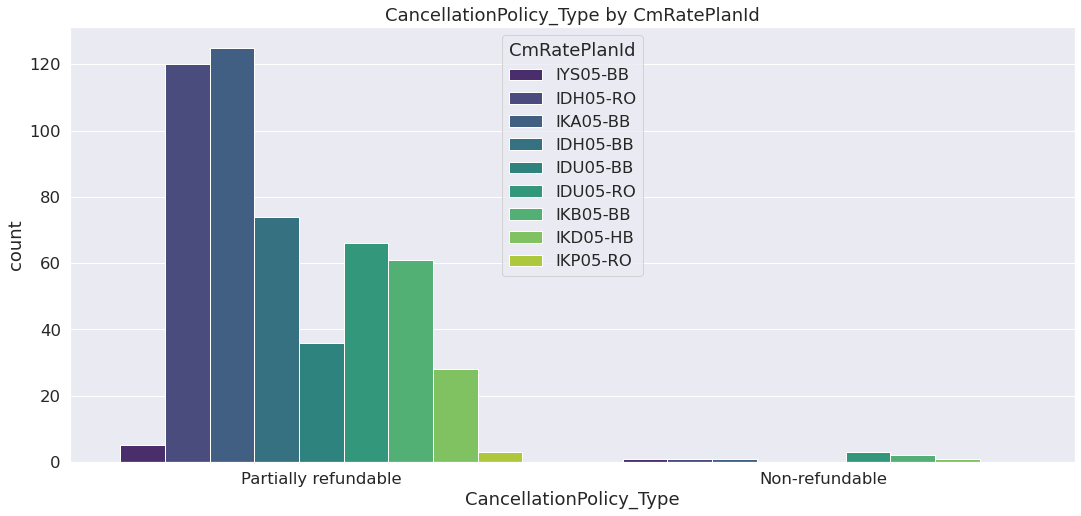

In [142]:
plt.figure(figsize=(18,8))
sns.set(font_scale = 1.5)
sns.countplot(x = OTA_HotelRateAmountNotifRQ.CancellationPolicy_Type, hue = OTA_HotelRateAmountNotifRQ.CmRatePlanId, data = OTA_HotelRateAmountNotifRQ, palette = 'viridis')
plt.title('CancellationPolicy_Type by CmRatePlanId')
plt.show()

#### Checking against null values for CancellationPolicy_RefundWithoutNights

In [143]:
OTA_HotelRateAmountNotifRQ.CancellationPolicy_RefundWithoutNights.isna().sum()

9

####  Breaking CancellationPolicy_RefundWithoutNights by Origin

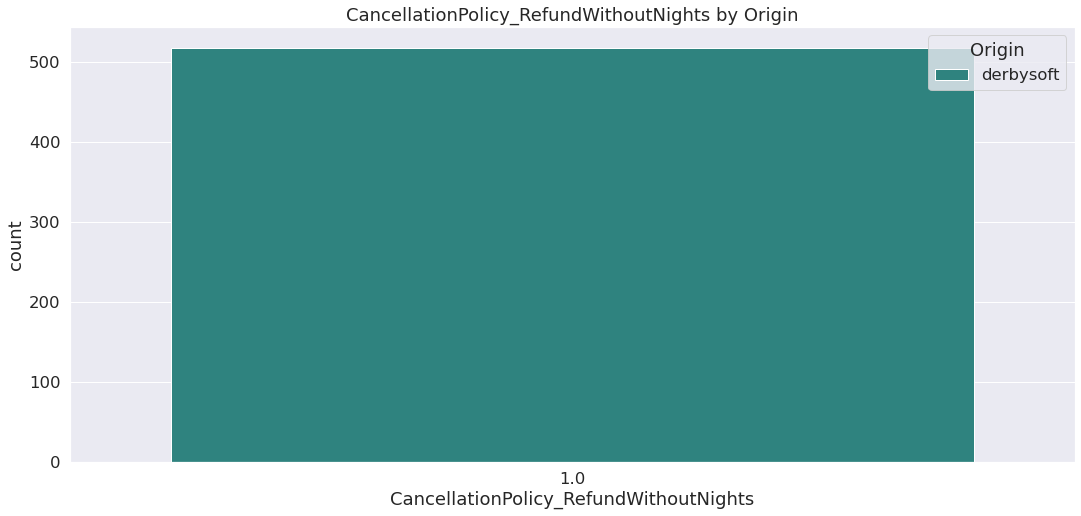

In [144]:
plt.figure(figsize=(18,8))
sns.set(font_scale = 1.5)
sns.countplot(x = OTA_HotelRateAmountNotifRQ.CancellationPolicy_RefundWithoutNights, hue = OTA_HotelRateAmountNotifRQ.Origin, data = OTA_HotelRateAmountNotifRQ, palette = 'viridis')
plt.title('CancellationPolicy_RefundWithoutNights by Origin')
plt.show()

#### Breaking CancellationPolicy_RefundWithoutNights by CmRatePlanId

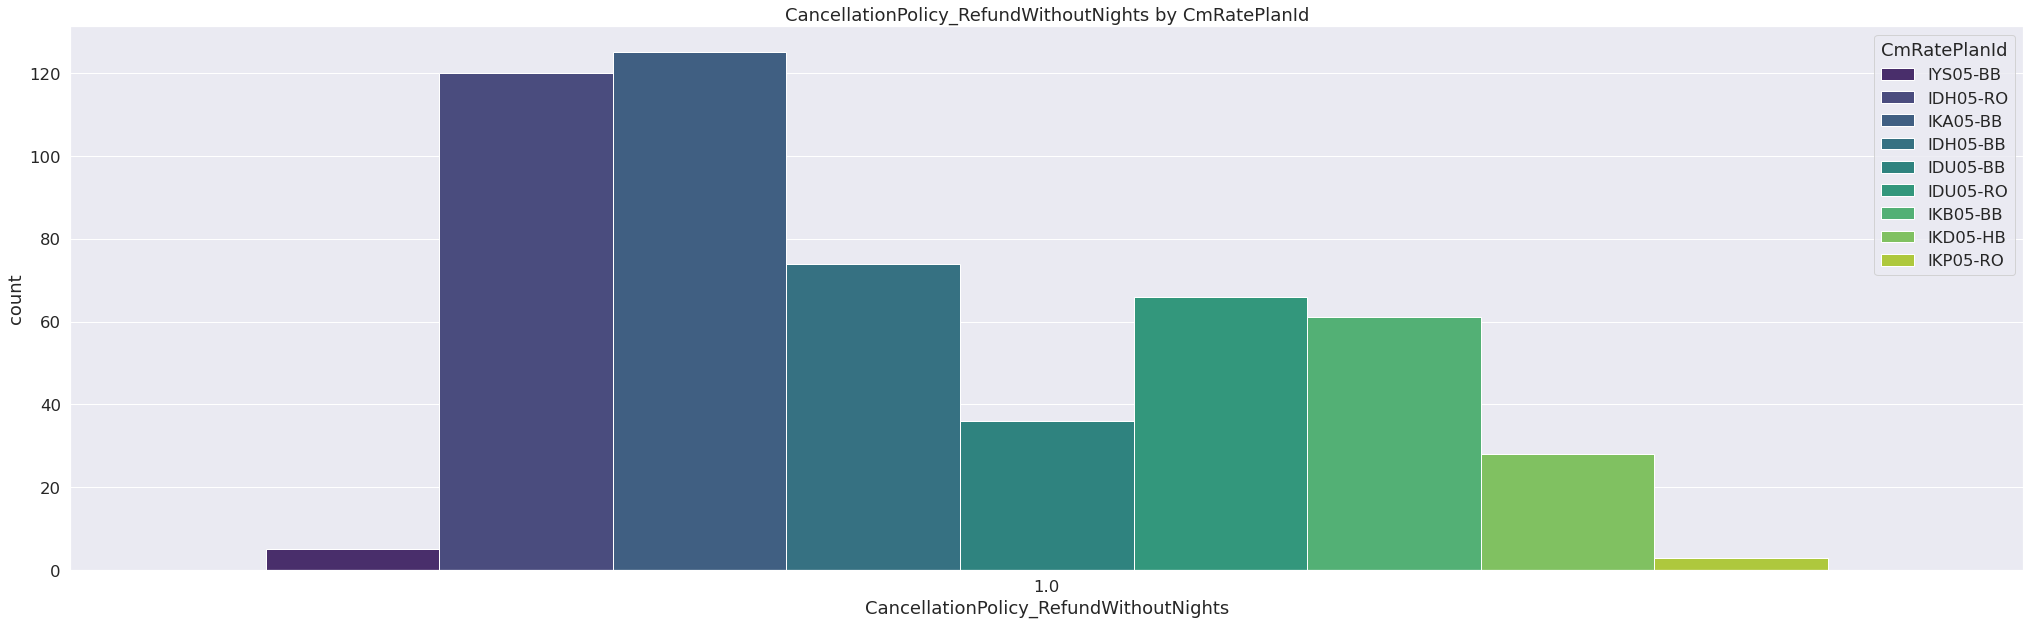

In [145]:
plt.figure(figsize=(35,10))
sns.set(font_scale = 1.5)
sns.countplot(x = OTA_HotelRateAmountNotifRQ.CancellationPolicy_RefundWithoutNights, hue = OTA_HotelRateAmountNotifRQ.CmRatePlanId, data = OTA_HotelRateAmountNotifRQ, palette = 'viridis')
plt.title('CancellationPolicy_RefundWithoutNights by CmRatePlanId')
plt.show()